# CS 425 fall 2021 Assignment 2


## Motif finding

In class we described the Gibbs sampling approach to motif finding.  Implement the algorithm and apply it to the sequences provided as the fasta file associated with this assignment, available via Canvas.  Run your algorithm and experiment with different motif lengths and other parameters of the algorithm.  Do you obtain consistent results across different runs of your code?
The data you were given is taken from ChIP-seq experiments for the transcription factor USF1.  Compare the motif your found with the motif provided in the [CIS-BP database](http://cisbp.ccbr.utoronto.ca/) and comment on the similarity.
Note that the provided file contains a large number of sequences.  
When developing your algorithm, test it first on a toy dataset that you create by embedding a motif in a small set of short sequences.  Demonstrate that your algorithm indeed works on this small dataset.

The motif found by your Gibbs sampler should be returned as a list-of-lists, where each element in the list is a list of length four that corresponds to a position in the motif.
For example, the list 
```Python
[[1.0, 0, 0, 0], [0,1.0,0,0], [0,0,1.0,0],[0,0,0,1.0]]
```
corresponds to the motif `ACGT`.

In [20]:
import random as rnd
import copy
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
def find_motifs(genes, length) :
  # OUT OF ALL THE GENES REPLACE ONE OF THEM
  temp = copy.copy(genes)
  replaced = rnd.choice(temp)
  temp.remove(replaced)

  # Storing motif's
  motif = []
  for i in temp:
    start = rnd.randint(0, len(temp[0])-length)
    motif.append(i[start:start+length])

  #set to 1 for psuedocount
  countMotif = [{'A':1, 'C':1,'G':1,'T':1} for i in range(length)]

  # count motifs
  for index, sequence in enumerate(motif):
    for i in range(len(sequence)):
      countMotif[i][sequence[i]] += 1


  consensus_seq = ''
  info_content = np.zeros(4 * length)
  count = 0
  for i in range(len(countMotif)):
    max_key = max(countMotif[i], key=countMotif[i].get)
    consensus_seq += max_key

  # score
  score = 0
  for i, letter in enumerate(consensus_seq):
    if letter == 'A':
      score += countMotif[i]['C']
      score += countMotif[i]['G']
      score += countMotif[i]['T']
    if letter == 'C':
      score += countMotif[i]['A']
      score += countMotif[i]['G']
      score += countMotif[i]['T']
    if letter == 'G':
      score += countMotif[i]['C']
      score += countMotif[i]['A']
      score += countMotif[i]['T']
    if letter == 'T':
      score += countMotif[i]['C']
      score += countMotif[i]['G']
      score += countMotif[i]['A']
    
  # consensus
  for i in countMotif:
    for j in i.values():
      info_content[count] = (j/len(genes))*2
      count +=1

  info_content = np.reshape(info_content,(-1,4))

  return consensus_seq, score, info_content

#READ FILE
def read_fasta(file_name):
  data = []

  with open(file_name,"r") as f:
    for count, line in enumerate(f, start=1):
        if count % 2 == 0:
          data.append(line[:len(line)-3])

  return data

if __name__ == "__main__":
  # CHANGE THE FILE PATH TO READ FILE CORRECTLY
  gene_list = read_fasta("usf1_long.fasta") 

  #HERE YOU CAN CHANGE THE NUMBER OF ITERATIONS YOU DESIRE
  iterations = 10
  length = 4
  MAXSCORE = 10000000
  store = []
  BESTMOTIF = []
  x = ''

  for i in range(iterations):
    motif, score, seq = find_motifs(gene_list[1:12], length)
    if score < MAXSCORE:
      BESTMOTIF = []
      BESTMOTIF.append(motif) 
      x = seq
      MAXSCORE = score


  print(BESTMOTIF)
  print(x)

['GCTG']
[[0.18181818 0.54545455 1.09090909 0.72727273]
 [0.18181818 1.09090909 0.72727273 0.54545455]
 [0.54545455 0.18181818 0.72727273 1.09090909]
 [0.36363636 0.18181818 1.45454545 0.54545455]]


In [ ]:
# run your code and comment on the results

**Data Collection**
> For today's analysis I took in information given to me by Dr.Asa Ben-Hur. The file I downloaded was called usf1_long.fasta and it contained chip sequences of the human genome. The size of each sequence is 101 characters long consisting of ACGT characters and it contained 15572 strings of gene sequences. 

**Data Quality Check and Cleaning**
>The way the FASTA file came in was a little diffrent compared to last time. This time the information in the file came in with each sequence being on every other line. The space between the sequences had information that was not needed for my program. Before I even attempt to do anything with it I need to find a way to to read every other line in the FASTA file. This is an easy task to acomplished as you can see below. FIGURE 1

```
# FIGURE 1
def read_fasta(file_name):
  data = []

  with open(file_name,"r") as f:
    for count, line in enumerate(f, start=1):
        if count % 2 == 0:
          data.append(line[:len(line)-3])

  return data
```
>All I had to do is to start the count at one then everytime we read a sequence that was on an even line number, we added that string to a list. Then at the end I just returned the variable data that contained each sequence. After reading in the data, it was now time for the fun part.

**Data Processing**
>Whats fascinating about this problem is that motifs are random. So I needed to use Gibbs sampaling to try and find motifs that are hiding in many sequences. I did all of my work in one function which is something I try to never do but I felt confident in myself to keep everything organize and clean. I started off be creating a copy of the list contating the genes so when I make changes to them it wont effect the original variable. In Gibb's sampaling we also remove a random sequence and continue with the rest of the sequences.FIGURE 2

```
# FIGURE 2
def find_motifs(genes, length) :
  temp = copy.copy(genes)
  replaced = rnd.choice(temp)
  temp.remove(replaced)
```

>Next step in Gibbs sampaling is to randomly choose motifs in a sequence. At the beginning the user can choose the size of the motif and that will effect the code and also the probabilty of motifs. So what I did was randomly choose a starting point in each of the sequences and collect a motif of size x, being whatever the user chose in the main(). Keep in my mind that computers dont know random, so this is just pseudo random.FIGURE 3

```
# FIGURE 3
motif = []
  for i in temp:
    start = rnd.randint(0, len(temp[0])-length)
    motif.append(i[start:start+length])
```
>What I did next was to create a list of dictionaries that would hold the census of all motifs choosen. The reason I have it set to 1 is because in Gibbs sampaling we need to conduct pseudocount because we don't like it when the probability is 0%. Next, I count all the characters in every sequence. The way it has to be done though its that dictionary at index i needs to count the characters of all sequences in index i as well. After that, I created a variable that will hold the consesus of the motif. For this I just iterated through all the dictionaries in the list and used max() to get the nucleotide with the highest count. I get the key and add its character into the string.FIGURE 4

```
# FIGURE 4
#set to 1 for psuedocount
  countMotif = [{'A':1, 'C':1,'G':1,'T':1} for i in range(length)]

  # count motifs
  for index, sequence in enumerate(motif):
    for i in range(len(sequence)):
      countMotif[i][sequence[i]] += 1


  consensus_seq = ''
  info_content = np.zeros(4 * length)
  count = 0
  for i in range(len(countMotif)):
    max_key = max(countMotif[i], key=countMotif[i].get)
    consensus_seq += max_key
```
>Motifs are random so that is the reason that I run my program mutiple times to try to find the motif that best fits. This is why I calculate the score by getting the values from the dictionaries and I add up the points when the nucleotide doesn't equal the census. When I get the full score I hold on to the variable untill it is time to return all the variables needed. FIGURE 5

```
# FIGURE 5
score = 0
  for i, letter in enumerate(consensus_seq):
    if letter == 'A':
      score += countMotif[i]['C']
      score += countMotif[i]['G']
      score += countMotif[i]['T']
    if letter == 'C':
      score += countMotif[i]['A']
      score += countMotif[i]['G']
      score += countMotif[i]['T']
    if letter == 'G':
      score += countMotif[i]['C']
      score += countMotif[i]['A']
      score += countMotif[i]['T']
    if letter == 'T':
      score += countMotif[i]['C']
      score += countMotif[i]['G']
      score += countMotif[i]['A']
```
>Lastly, I created an array to hold the the probabily of each nucleotide for the size of length. I already had the data needed so I just need to do some calulations to get what I need. Then the last step in my function is to return the motif, score of motif, and the matrix with the probabilties. FIGURE 6

```
# FIGURE 6
for i in countMotif:
    for j in i.values():
      info_content[count] = (j/len(genes))*2
      count +=1

  info_content = np.reshape(info_content,(-1,4))

  return consensus_seq, score, info_content
```

>I have one more thing to do for my algorithm to be complete. Since I want the best scored motif I need to run my program mutiple times and once my function returns its parameters I check its score and see if its better than the prvious motif score. If it is, I want to replace it with the new best score. Finally, print out the information wanted. FIGURE 7


```
# FIGURE 7
 for i in range(iterations):
    motif, score, seq = find_motifs(gene_list[:11], length)
    if score < MAXSCORE:
      BESTMOTIF = []
      BESTMOTIF.append(motif)
      x = seq
      MAXSCORE = score


  print(BESTMOTIF)
  print(seq)
```

**Data Analysis**
>Now that I have the motif with the best score it is time to compare it with the motif that CIS-BP database collected. The first image is my output and the 2nd image in their output. If you look at my output, at index 5 to index 10 of the string in the list, it has the characters 'CACGTG'. When compared the 2nd image you can see that we collected the same motif. 

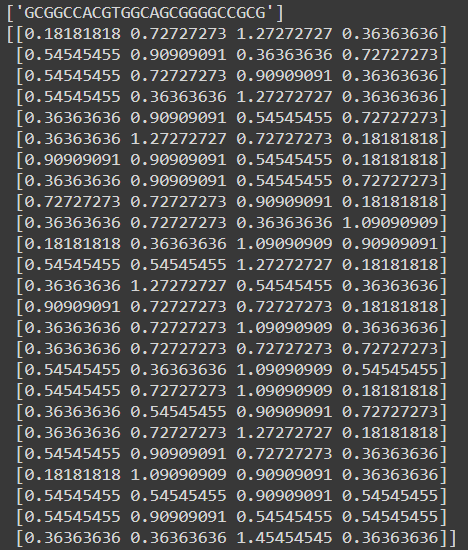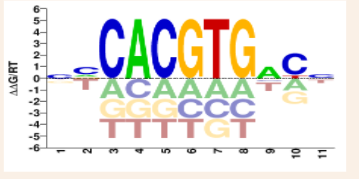

>When I saw this I was pleased because this took some time tweaking my code. Let me explain, I have three variables that effect how my code works and collects the motif. The first variable is called iterations and here we can choose how many times we want the function to be ran. We can do it once but its not very helpful since we wont have any other motifs to compare scores with and figure out which one is the better choice. The second variable decides how long we want the motif to be. The bigger the number the harder it is to find the correct motif. The final variable is the actual data of sequences we pass it. If you pass it the every single sequence in the FASTA file you will most likely get a motif that is all G's. I thought this was incorrect but when I looked in the FASTA file there were indeed sequences that contained six G's in a row. I also learned that the human genome just has a higher count of G's and C's so when I use my program to find the motif, it returns a string with lots of G's and C's.
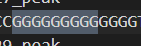

### Submission

Submit your assignment as a Jupyter notebook via Canvas.  

### Grading 

Here is what the grading sheet will look like for this assignment. 

```
Grading sheet for assignment 2
- Correctness of your Gibbs sampler (70 pts)
- Results and analysis (30 pts)

```
